In [71]:
import nibabel as nib
import numpy as np
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge
from sklearn.decomposition import TruncatedSVD, KernelPCA, PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from scipy.ndimage.interpolation import zoom
from math import sqrt
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt,atan2,pi,ceil,acos,sin,cos

from orelmisc import n_max,n_test_max,testpre,trainpre,saveCSV,shape_3d_org
from preprocess import flatten,flatten_each_sample,loadData,flatten_each_sample,precompute_and_save

In [72]:
prep_ = lambda i: cap(i)
def prep(a):
  return np.array(map(prep_single,a))

prep_single = lambda pi:map(prep_,pi)

cap = lambda p: 0 if min(1,max(0,p)) < 0.5 else 1
def pred_to_rgb(p):
  p = cap(p)
  v = p
  return (1-v,v,0.2)

x_org = None
x_t_org = None
xa_org = None
d_org = None
y_t_pred = None
yts_pred = None
y_t_pp = None
y = np.zeros((n_max,3))
# gender: 1 = female, 0 = male
# age: 1 = young, 0 = old
# health: 1 = healthy, 0 = sick
y_gender = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_age = [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y_health = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y[:,0] = np.array(y_gender)
y[:,1] = np.array(y_age)
y[:,2] = np.array(y_health)

y_ageP1 = np.array([20, 25, 61, 84, 23, 69, 83, 62, 72, 52, 52, 25, 19, 70, 26, 83, 83,73, 22, 21, 30, 30, 18, 68, 24, 22, 65, 80, 64, 24, 87, 80, 81, 72,23, 24, 70, 66, 22, 34, 82, 25, 23, 19, 20, 25, 23, 23, 71, 20, 86,81, 40, 57, 76, 84, 20, 18, 81, 74, 80, 41, 50, 88, 71, 82, 35, 23,88, 54, 44, 87, 80, 49, 48, 44, 21, 65, 78, 84, 48, 22, 43, 21, 31,23, 76, 39, 89, 21, 69, 60, 85, 23, 71, 48, 75, 78, 89, 51, 55, 22,73, 20, 74, 48, 18, 71, 78, 48, 74, 26, 75, 94, 49, 84, 22, 90, 26,81, 55, 80, 19, 20, 22, 77, 75, 37, 20, 72, 77, 29, 69, 74, 74, 64,80, 22, 90, 28, 21, 20, 85, 82, 71, 70, 21, 78, 87, 28, 46, 79, 24,54, 24, 51, 80, 78, 72, 93, 89, 75, 89, 58, 50, 58, 22, 96, 73, 78,28, 45, 18, 91, 20, 83, 43, 78, 71, 59, 83, 73, 64, 69, 20, 20, 28,86, 72, 90, 68, 90, 22, 67, 84, 48, 67, 78, 21, 54, 20, 22, 73, 20,27, 77, 72, 86, 33, 65, 31, 19, 65, 50, 27, 73, 50, 19, 80, 80, 88,55, 54, 72, 26, 80, 41, 81, 77, 79, 19, 71, 89, 88, 68, 20, 54, 23,22, 43, 21, 86, 81, 80, 22, 74, 55, 21, 20, 63, 51, 45, 46, 22, 23,80, 73, 84, 58, 20, 83, 67, 38, 26, 26, 77, 69, 24, 22, 26, 23, 20,54, 25, 55, 22, 23, 25])

prefix=None
alpha = 10
result = None
xa = []
x = None
x_t = None
TO_RADIANS = pi/180

In [73]:
space = 70 #35 # 35,50,70,100,150
bins = np.linspace(1,1700,space)
hSize = space-1
r_division = 6
theta_division = 4
phi_division = 6
ranges = [1,r_division,theta_division,phi_division]
nHists = r_division*theta_division*phi_division

name = "output/"+str(space)+"_split_validated"
fname = "many_hists"+str(nHists)+"_space" + str(space) + ("_divs_%s_%s_%s.npy" % (r_division,theta_division,phi_division))
fnameSpherical = "spherical_every2.npy"
fnameMeanHist = "mean_hist" + str(space) + ".npy"
fnameMeanHists = "mean_hists" + str(space) + ".npy"

# TODO: include spherical file
xSpherical = np.load(fnameSpherical)
#bins = np.linspace(1,1800,space)
sbins = bins[:-1]+1800/space/2
ds = nHists*hSize # sum,sum2,sum3,avg,var,mode, numper of percentiles and histograms
iHist = 0
idxHist = lambda i: iHist+i*hSize
# radius form 0 to 80
# theta from 0 to 180
# phi from 0 to 360
rMax = 80
tMin = 30
tMax = 180-tMin

print "Number of Histograms:",nHists
print "Size of Histograms:",hSize
print "Dimensions: ca.",nHists*hSize

Number of Histograms: 144
Size of Histograms: 69
Dimensions: ca. 9936


In [74]:
def myloop(a):
    return (a,a*a,a*a*a)

def spherical2cart(r,theta,phi):
  return (r*sin(theta)*cos(phi),r*sin(theta)*sin(phi),r*cos(theta))

myloopU = np.frompyfunc(myloop,1,3,dtype=np.float64)
fromto = lambda di,sph: zip(np.round(np.linspace(0,sph.shape[di],ranges[di]+1)),np.round(np.linspace(0,sph.shape[di],ranges[di]+1))[1:])

def loadAndPreprocess():
    global d_org,x,x_t,xa,x_org,x_t_org,xa_org,xSpherical
    
    xa = np.zeros((n_max+n_test_max,ds))
    #xSpherical = np.zeros((n_max+n_test_max,rMax/2+1,(tMax-tMin)/2+1,360/2+1))
    
    i = 0
    #print "===== Calculate spherical coordiantes ===="
    
    while i < n_max+n_test_max:
      if i % 6 == 0:
        print "  i = %s ... %.1f%%" % (i,float(i)/(n_max+n_test_max)*100)
      
      n_i,pre,t_str = (n_max,"set_train/","train") if i < n_max else (n_test_max,"set_test/","test")
      filename = "%s%s_%s.nii" % (pre,t_str,i%n_max+1)
      Xtotal,Ytotal,Ztotal = (176,208,176)
      data = nib.load(filename).get_data().reshape((Xtotal,Ytotal,Ztotal))
      
      """Calculate zoomed spherical representation, needs 3 seconds
      for r in np.linspace(0,rMax,rMax/2+1):
        for theta in np.linspace(tMin,tMax,(tMax-tMin)/2+1):
          for phi in np.linspace(0,360,360/2+1):
            x,y,z = spherical2cart(r,theta*TO_RADIANS,phi*TO_RADIANS)
            x = x + Xtotal/2
            y = y + Ytotal/2
            z = z + Ztotal/2
            if 0 <= x < Xtotal and 0 <= y < Ytotal and 0 <= z < Ztotal:
              xSpherical[i,r/2,(theta-tMin)/2,phi/2] = data[int(x),int(y),int(z)]"""

      # calculate histograms: 8*4*8 = 256 histograms
      hCount = 0
      for l,u in fromto(1,xSpherical):
        l0,u0=(int(l),int(u))
        for l,u in fromto(2,xSpherical):
          l1,u1=(int(l),int(u))
          for l,u in fromto(3,xSpherical):
            l2,u2=(int(l),int(u))
            cut = xSpherical[i,l0:u0,l1:u1,l2:u2]
            h=np.histogram(cut.ravel(),bins=bins)[0]
            xa[i,(iHist+(hCount*hSize)):(iHist+(hCount+1)*hSize)] = h
            hCount = hCount + 1
      i = i+1
    
    np.save(fname,xa)
    print "======= Saved data matrix xa into %s =========" % fname
    
    #np.save(fnameSpherical,xSpherical)
    #print "======= Saved spherical coordinates into %s =========" % fnameSpherical

if False:
  loadAndPreprocess()
else:
  xa = np.load(fname)
  x,x_t = (xa[0:n_max,:],xa[n_max:,:])

In [75]:
if False:
  i = 413
  for theta in np.linspace(0,xSpherical[i].shape[1]-1,9):
    print theta
    plt.imshow(xSpherical[i,:,theta,:], cmap="gray", origin="lower")
    plt.show()

In [92]:
from sklearn.model_selection import train_test_split
# TODO: need to do label-balanced splitting

# xa. all data
# x. public training data
# y. public training targets
# x_t public to be predicted data

# xtr. training data
# ytr. training targets
# xts. validation data
# yts. validation targets

# indices for splitting
ones = np.array(filter(lambda i: y[i,2]==1,range(0,n_max)))
zeros = np.array(filter(lambda i: y[i,2]==0,range(0,n_max)))
# split the indices
onestr,onests,_,_ = train_test_split(ones,ones*0,test_size=0.3,random_state=1)
zerostr,zerosts,_,_ = train_test_split(zeros,zeros*0,test_size=0.3,random_state=1)

# plot the data. a few random states have been tried to to make sure all splits are balanced enough.
print "Indices for total data: "
print "healthy",len(ones),": ",ones[5:15],"..."
print "sick",len(zeros),": ",zeros[5:15],"...\n"

print "Indices for splitted data: "
print "healthy training ",len(onestr),": ",onestr[5:15],"..."
print "healthy test ",len(onests),": ",onests[5:15],"..."
print "sick training ",len(zerostr),": ",zerostr[5:15],"..."
print "sick test ",len(zerosts),": ",zerosts[5:15],"..."

print "="*15,"Healthy training","="*15
#plot3D(matrix=x[:,iHist:][onestr],age=y_age[onestr],health=y[onestr])
print "="*15,"Healthy test","="*15
#plot3D(matrix=x[:,iHist:][onests],age=y_age[onests],health=y[onests])
print "="*15,"sick training","="*15
#plot3D(matrix=x[:,iHist:][zerostr],age=y_age[zerostr],health=y[zerostr])
print "="*15,"sick test","="*15
#plot3D(matrix=x[:,iHist:][zerosts],age=y_age[zerosts],health=y[zerosts])

xtr = np.vstack((x[onestr],x[zerostr]))
xts = np.vstack((x[onests],x[zerosts]))
ytr = np.vstack((y[onestr],y[zerostr]))
yts = np.vstack((y[onests],y[zerosts]))

print "Splitted data into test and validation data"

Indices for total data: 
healthy 211 :  [ 5  6  7  9 10 11 12 14 18 19] ...
sick 67 :  [27 30 36 37 48 51 54 55 58 60] ...

Indices for splitted data: 
healthy training  147 :  [123 198  98 149  53  22   5 208 228  63] ...
healthy test  64 :  [111  42 200 271 171 119   4  62  23  76] ...
sick training  46 :  [161 121  37  77 225 255 242 206 229 261] ...
sick test  21 :  [158  15 181 197 143 249 177 241 194 167] ...
=============== Healthy training ===============
=============== Healthy test ===============
=============== sick training ===============
=============== sick test ===============
Splitted data into test and validation data


In [93]:
#TODO: adapt classification

from sklearn.metrics import hamming_loss
       
def makeAdaDefaultBaseEstimatorPrediction(n_est,max_depth,msplit):
  global y_t_pred,yts_pred,result,y_t_pp
  print "Prediction default decision tree (max_depth=%s, msplit=%s) and #estimators = %s" % (max_depth,msplit,n_est)
  prefix = "%s_AdaBoost_est%s_default_decision_tree_depth%s_msplit%s"%(name,n_est,max_depth,msplit)
  model = AdaBoostRegressor(
            DecisionTreeRegressor(random_state=1,max_depth=max_depth,min_samples_split=msplit)
    ,n_estimators=n_est,random_state=1)
  xtr1 = xtr[:,:] # use all data
  xts1 = xts[:,:] # use all data
  x_t1 = x_t[:,:]
  yts_pred = model.fit(xtr1,ytr).predict(xts1)
  y_t_pred = model.predict(x_t1)
  
  y_t_pp = prep(y_t_pred)
  ltr = log_loss(ytr,prep(model.predict(xtr1)))
  lts = log_loss(yts,prep(yts_pred))
  ltm= log_loss(yts,y_mean[:len(yts)])
  print("\n")
  print("============================    Log-Loss train           ltr = %.3f =========="%ltr)
  print("============================    Log-Loss test            lts = %.3f =========="%lts)
  print("============================    Log-Loss mean prediciton ltm = %.3f ==========\n\n"%ltm)
  plt.clf()
  plt.plot([np.max(np.abs(ws)) for ws in model.estimator_weights_],"ro")
  plt.title("abs-largest_est-weight")
  plt.savefig(prefix+"_abs-largest_est-weight.png")
  plt.show()
  prefix = "%s_expected_score%.3f"%(prefix,lts)
  return prefix,model

# no!
def makeBaggingBoostLassoPrediction(al,n_est,feats,samps):
  global y_t_pred,yts_pred,result,alpha,y_t_pp
  alpha = al
  print "Prediction with alpha = %s and #estimators = %s" % (alpha,n_est)
  prefix = "%s_BaggingRegressor_est%s_feats%s_samps%s_Lasso_alpha%s"%(name,n_est,feats,samps,alpha)
  model = BaggingRegressor(Lasso(alpha=alpha),
                           n_estimators=n_est,random_state=1,
                          max_features=feats,
                          max_samples=samps)
  xtr1 = xtr[:,:] # use all data
  xts1 = xts[:,:] # use all data
  x_t1 = x_t[:,:]
  yts_pred = model.fit(xtr1,ytr).predict(xts1)
  y_t_pred = model.predict(x_t1)
  
  y_t_pp = prep(y_t_pred)
  ltr = log_loss(ytr,prep(model.predict(xtr1)))
  lts = log_loss(yts,prep(yts_pred))
  ltm= log_loss(yts,y_mean[:len(yts)])
  print("\n")
  print("============================    Log-Loss train           ltr = %.3f =========="%ltr)
  print("============================    Log-Loss test            lts = %.3f =========="%lts)
  print("============================    Log-Loss mean prediciton ltm = %.3f ==========\n\n"%ltm)
  prefix = "%s_expected_score%.3f"%(prefix,lts)
  return prefix,model
    
# ... ...
def invert(p):
  return map(lambda x:1-x,p)

def kernelSVMwithDimReduction(kernel,k1,coef0,probability,degree,gamma,C,n_comps):
  global y_t_pred,yts_pred,result,y_t_pp
  prefix = "%s_SVM_with_dim_red_kernel%s_coef0%s_degree%d_probability%s"%(name,kernel,coef0,degree,probability)
  print "Prediction with %s" % prefix
  pca = KernelPCA(kernel=k1,n_components=n_comps)
  #pca = TruncatedSVD(n_components=n_comps,n_iter=20)
  model = SVC(kernel=kernel,coef0=coef0,probability=probability,degree=degree,random_state=0,gamma=gamma,C=C)
  xtr1 = xtr[:,idxHist(0):idxHist(256)] # use all data
  xts1 = xts[:,idxHist(0):idxHist(256)] # use all data
  x_t1 = x_t[:,idxHist(0):idxHist(256)]
  transformed = pca.fit_transform(xtr1)
  yts_pred = model.fit(transformed,ytr).predict(pca.transform(xts1))
  y_t_pred = model.predict(pca.transform(x_t1))
  
  y_t_pp = prep(y_t_pred)
  yts_pp = prep(yts_pred)
  ytr_pp = prep(model.predict(pca.transform(xtr1)))
  ltr = log_loss(ytr,ytr_pp)
  lts = log_loss(yts,yts_pp)
  ltm = log_loss(yts,y_mean[:len(yts)])
  print("\n")
  print("============================    Log-Loss train           ltr = %.3f =========="%ltr)
  print("============================    Log-Loss test            lts = %.3f =========="%lts)
  print("============================    Log-Loss mean prediciton ltm = %.3f ==========\n\n"%ltm)
  trCorrect = len(map(lambda x:x[0]-x[1],filter(lambda x:x[0]!=x[1],zip(ytr,ytr_pp))))
  tsCorrect = len(map(lambda x:x[0]-x[1],filter(lambda x:x[0]!=x[1],zip(yts,yts_pp))))
  print "Predictions training: %s correct / %s incorrect" %(trCorrect,len(xtr)-trCorrect)
  print "Predictions validation: %s correct / %s incorrect" %(tsCorrect,len(xts)-tsCorrect)
  sv = model.support_
  print "Indices of Spport Vectors: %s..." % sv
  plot3D(xtr[:,iHist:][sv],age=y_age[sv],health=y[sv],save_as=prefix+"_support_Vectors",small=False)
  prefix = "%s_expected_score%.3f"%(prefix,lts)
  return prefix,model


# good: 0.31
def onevsrest(n_est,f,msp,max_depth,histMin,histMax):
  global result
  prefix = "%s_OneVsRest_RandomForest_histMin%s_histMax%s_n%s_feats%s_msp%s_max_depth%s"%(name,histMin,histMax,n_est,f,msp,max_depth)
  print "Prediction with %s" % prefix
  model = MultiOutputClassifier(RandomForestClassifier(n_est,max_features=f,min_samples_split=msp,max_depth=max_depth,random_state=1))
  xtr1 = xtr[:,idxHist(histMin):idxHist(histMax)] # use all data
  xts1 = xts[:,idxHist(histMin):idxHist(histMax)] # use all data
  x_t1 = x_t[:,idxHist(histMin):idxHist(histMax)]
  yts_pred = model.fit(xtr1,ytr).predict(xts1)
  y_t_pred = model.predict(x_t1)
  
  y_t_pp = prep(y_t_pred)
  yts_pp = prep(yts_pred)
  ytr_pp = prep(model.predict(xtr1))
  ltr = hamming_loss(ytr,ytr_pp)
  lts = hamming_loss(yts,yts_pp)
  print("\n")
  print("============================    Hamming-Loss train           ltr = %.3f =========="%ltr)
  print("============================    Hamming-Loss test            lts = %.3f =========="%lts)
  print "Score: " % model.score(xts1,yts)
  prefix = "%s_expected_score%.3f"%(prefix,lts)
  return prefix,model,y_t_pp

# good: 0.31
def randomForest(label,n_est,f,msp,max_depth,histMin,histMax):
  global result
  prefix = "%s_RandomForest_histMin%s_histMax%s_n%s_feats%s_msp%s_max_depth%s"%(name,histMin,histMax,n_est,f,msp,max_depth)
  print "Prediction with %s" % prefix
  model = RandomForestRegressor(n_est,max_features=f,min_samples_split=msp,max_depth=max_depth,random_state=1)
  xtr1 = xtr[:,idxHist(histMin):idxHist(histMax)] # use all data
  xts1 = xts[:,idxHist(histMin):idxHist(histMax)] # use all data
  x_t1 = x_t[:,idxHist(histMin):idxHist(histMax)]
  yts_pred = model.fit(xtr1,ytr[:,label]).predict(xts1)
  y_t_pred = model.predict(x_t1)
  
  y_t_pp = prep_single(y_t_pred)
  yts_pp = prep_single(yts_pred)
  ytr_pp = prep_single(model.predict(xtr1))
  ltr = hamming_loss(ytr[:,label],ytr_pp)
  lts = hamming_loss(yts[:,label],yts_pp)
  print("\n")
  print("============================    Hamming-Loss train           ltr = %.3f =========="%ltr)
  print("============================    Hamming-Loss test            lts = %.3f =========="%lts)
  trCorrect = len(map(lambda x:x[0]-x[1],filter(lambda x:x[0]!=x[1],zip(ytr[:,label],ytr_pp))))
  tsCorrect = len(map(lambda x:x[0]-x[1],filter(lambda x:x[0]!=x[1],zip(yts[:,label],yts_pp))))
  print "Predictions training: %s correct / %s incorrect" %(trCorrect,len(xtr)-trCorrect)
  print "Predictions validation: %s correct / %s incorrect" %(tsCorrect,len(xts)-tsCorrect)
  print "Score: " % model.score(xts1,yts[:,label])
  prefix = "%s_expected_score%.3f"%(prefix,lts)
  return prefix,model,y_t_pp

def kSVM_Ada(kernel,k1,coef0,probability,degree,gamma,C,n_comps,n_est):
  global y_t_pred,yts_pred,result,alpha,y_t_pp
  prefix = "%s_AdaBoost_est%s_SVM_with_dim_red_kernel%s_coef0%s_degree%d_probability%s"%(name,n_est,kernel,coef0,degree,probability)
  print "Prediction with %s" % prefix
  pca = KernelPCA(kernel=k1,n_components=n_comps)
  modelIn = SVC(kernel=kernel,coef0=coef0,probability=probability,degree=degree,random_state=0,gamma=gamma,C=C)
  model = AdaBoostRegressor(modelIn,n_estimators=n_est,random_state=0)
  xtr1 = pca.fit_transform(xtr[:,idxHist(0):idxHist(256)]) # use all data
  xts1 = pca.transform(xts[:,idxHist(0):idxHist(256)]) # use all data
  x_t1 = pca.transform(x_t[:,idxHist(0):idxHist(256)])
  yts_pred = model.fit(xtr1,ytr).predict(xts1)
  y_t_pred = model.predict(x_t1)
  
  y_t_pp = prep(y_t_pred)
  ltr = log_loss(ytr,prep(model.predict(xtr1)))
  lts = log_loss(yts,prep(yts_pred))
  ltm = log_loss(yts,y_mean[:len(yts)])
  print("\n")
  print("============================    Log-Loss train           ltr = %.3f =========="%ltr)
  print("============================    Log-Loss test            lts = %.3f =========="%lts)
  print("============================    Log-Loss mean prediciton ltm = %.3f ==========\n\n"%ltm)
  coeffs = model.estimators_[-1].support_vectors_
  print "Last Support Vectors: %s..." % coeffs[:5]
  plt.clf()
  plt.plot([np.max(np.abs(ws)) for ws in model.estimator_weights_],"ro")
  plt.title("abs-largest_est-weight")
  plt.savefig(prefix+"_abs-largest_est-weight.png")
  plt.show()
  prefix = "%s_expected_score%.3f"%(prefix,lts)
  return prefix,model

"""def EnsembleTheKernelSVM(kernel,k1,coef0,probability,degree,gamma,C,n_comps,n_est):
  global y_t_pred,yts_pred,result,alpha,y_t_pp
  prefix = "%s_Ensemble_est%s_SVM_with_dim_red_kernel%s_coef0%s_degree%d_probability%s"%(name,n_est,kernel,coef0,degree,probability)
  print "Prediction with %s" % prefix
  pca = KernelPCA(kernel=k1,n_components=n_comps)
  model = SVC(kernel=kernel,coef0=coef0,probability=probability,degree=degree,random_state=0,gamma=gamma,C=C)
  xtr1 = pca.fit_transform(xtr[:,idxHist(0):idxHist(256)]) # use all data
  xts1 = pca.transform(xts[:,idxHist(0):idxHist(256)]) # use all data
  x_t1 = pca.transform(x_t[:,idxHist(0):idxHist(256)])
  
  model = fit(model,xtr1,ytr)
  yts_pred = predict(model,xts1)
  y_t_pred = predict(model,x_t1)
  
  y_t_pp = prep(y_t_pred)
  ltr = log_loss(ytr,prep(model.predict(xtr1)))
  lts = log_loss(yts,prep(yts_pred))
  ltm = log_loss(yts,y_mean[:len(yts)])
  print("\n")
  print("============================    Log-Loss train           ltr = %.3f =========="%ltr)
  print("============================    Log-Loss test            lts = %.3f =========="%lts)
  print("============================    Log-Loss mean prediciton ltm = %.3f ==========\n\n"%ltm)
  coeffs = model.estimators_[-1].support_vectors_
  print "Last Support Vectors: %s..." % coeffs[:5]
  plt.clf()
  plt.plot([np.max(np.abs(ws)) for ws in model.estimator_weights_],"ro")
  plt.title("abs-largest_est-weight")
  plt.savefig(prefix+"_abs-largest_est-weight.png")
  plt.show()
  prefix = "%s_expected_score%.3f"%(prefix,lts)
  return prefix,model"""

# toobad :(
def kernelSVM(kernel,coef0,probability,degree,gamma,C):
  global y_t_pred,yts_pred,result,y_t_pp
  prefix = "%s_SVM_kernel%s_coef0%s_degree%d_probability%s"%(name,kernel,coef0,degree,probability)
  print "Prediction with %s" % prefix
  model = SVC(kernel=kernel,coef0=coef0,probability=probability,degree=degree,random_state=0,gamma=gamma,C=C)
  xtr1 = xtr[:,idxHist(55):idxHist(56)] # use all data
  xts1 = xts[:,idxHist(55):idxHist(56)] # use all data
  x_t1 = x_t[:,idxHist(55):idxHist(56)]
  yts_pred = model.fit(xtr1,ytr).predict(xts1)
  y_t_pred = model.predict(x_t1)
  
  y_t_pp = prep(y_t_pred)
  yts_pp = prep(yts_pred)
  ytr_pp = prep(model.predict(xtr1))
  ltr = log_loss(ytr,ytr_pp)
  lts = log_loss(yts,yts_pp)
  ltm = log_loss(yts,y_mean[:len(yts)])
  print("\n")
  print("============================    Log-Loss train           ltr = %.3f =========="%ltr)
  print("============================    Log-Loss test            lts = %.3f =========="%lts)
  print("============================    Log-Loss mean prediciton ltm = %.3f ==========\n\n"%ltm)
  trCorrect = len(map(lambda x:x[0]-x[1],filter(lambda x:x[0]!=x[1],zip(ytr,ytr_pp))))
  tsCorrect = len(map(lambda x:x[0]-x[1],filter(lambda x:x[0]!=x[1],zip(yts,yts_pp))))
  print "Predictions training: %s correct / %s incorrect" %(trCorrect,len(xtr)-trCorrect)
  print "Predictions validation: %s correct / %s incorrect" %(tsCorrect,len(xts)-tsCorrect)
  sv = model.support_
  print "Indices of Spport Vectors: %s..." % sv
  plot3D(xtr[:,iHist:][sv],age=y_age[sv],health=y[sv],save_as=prefix+"_support_Vectors",small=False)
  prefix = "%s_expected_score%.3f"%(prefix,lts)
  return prefix,model


# best score: 0.33
def makeAdaLassoPrediction(al,n_est):
  global y_t_pred,yts_pred,result,alpha,y_t_pp
  alpha = al
  print "Prediction with alpha = %s and #estimators = %s" % (alpha,n_est)
  prefix = "%s_AdaBoost_est%s_Lasso_alpha%s"%(name,n_est,alpha)
  model = AdaBoostRegressor(Lasso(alpha=alpha),n_estimators=n_est,random_state=0)
  xtr1 = xtr[:,idxHist(50):idxHist(51)] # use all data
  xts1 = xts[:,idxHist(50):idxHist(51)] # use all data
  x_t1 = x_t[:,idxHist(50):idxHist(51)]
  yts_pred = model.fit(xtr1,ytr).predict(xts1)
  y_t_pred = model.predict(x_t1)
  
  y_t_pp = prep(y_t_pred)
  ltr = log_loss(ytr,prep(model.predict(xtr1)))
  lts = log_loss(yts,prep(yts_pred))
  ltm= log_loss(yts,y_mean[:len(yts)])
  print("\n")
  print("============================    Log-Loss train           ltr = %.3f =========="%ltr)
  print("============================    Log-Loss test            lts = %.3f =========="%lts)
  print("============================    Log-Loss mean prediciton ltm = %.3f ==========\n\n"%ltm)
  coeffs = model.estimators_[-1].coef_
  print "Last estimator coefficients: %s..." % coeffs[:5]
  bla1 = (sorted(enumerate(coeffs),key=lambda x:-abs(x[1]))[:10])
  print "Most-important features (by max abs):"
  for s in bla1:
    print s
  plt.clf()
  plt.plot([np.max(np.abs(ws)) for ws in model.estimator_weights_],"ro")
  plt.title("abs-largest_est-weight"%(bla1))
  plt.savefig(prefix+"_abs-largest_est-weight.png")
  plt.show()
  prefix = "%s_expected_score%.3f"%(prefix,lts)
  return prefix,model

In [94]:
def doStuff(al=15,comps=n_max-1,n_est=120,k1="rbf",
            max_depth=7,msplit=10,feats=0.3,samps=0.3,
            kernel="rbf",coef0=1,p=False,deg=3,gamma=1.0/600,C=80,n_comps=15,f=0.5,msp=15,hmin=0,hmax=50):
  global prefix,result
  #loadAndPreprocess()
  
  #prefix,model = makeLassoPrediction(al=al)
  #prefix,model = makeAdaDefaultBaseEstimatorPrediction(n_est=n_est,max_depth=max_depth,msplit=msplit)
  #prefix,model = makeAdaLassoPrediction(al=al,n_est=n_est)
  #prefix,model = kernelSVM(kernel=kernel,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C)
  #prefix,model = kernelSVMwithDimReduction(kernel=kernel,k1=k1,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C,n_comps=n_comps)
  #prefix,model = kSVM_Ada(n_est=n_est,kernel=kernel,k1=k1,coef0=coef0,probability=p,degree=deg,gamma=gamma,C=C,n_comps=n_comps)
  #prefix,model = makeBaggingBoostLassoPrediction(al=al,n_est=n_est,feats=feats,samps=samps)
  #prefix,model = makeSVDLassoPrediction(al=al,comps=comps)
  #prefix,model = makeLassoCVPrediction(cv=3)
  #prefix,model = makeLinearRegression()
  #prefix,model = makeRidgePrediction(al=al)
  #prefix,model = makeGaussianProcess()
  # Bagging Lasso works poorly when validated and on the public score. forget this.
  #prefix,model = makeBaggingBoostLassoPrediction(al=al,n_est=n_est,feats=feats,samps=samps)
  
  """prefix,model,y_gender_pred = randomForest(label=0,n_est=n_est,f=f,msp=msp,max_depth=max_depth,histMin=hmin,histMax=hmax)
  visualize("Gender",y_gender_pred,prefix)
  _,model,y_age_pred = randomForest(label=1,n_est=n_est,f=f,msp=msp,max_depth=max_depth,histMin=hmin,histMax=hmax)
  visualize("Age",y_age_pred,prefix)
  _,model,y_health_pred = randomForest(label=2,n_est=n_est,f=f,msp=msp,max_depth=max_depth,histMin=hmin,histMax=hmax)
  visualize("Health",y_health_pred,prefix)"""
  
  prefix,model,y_pred_all = onevsrest(n_est=n_est,f=f,msp=msp,max_depth=max_depth,histMin=hmin,histMax=hmax)
  visualize("Gender",y_pred_all[:,0],prefix)
  visualize("Age   ",y_pred_all[:,1],prefix)
  visualize("Health",y_pred_all[:,2],prefix)
  
  
  #y_pred_all = np.array([y_gender_pred,y_age_pred,y_health_pred]).transpose()

  print "predictions of shape ",y_pred_all.shape
    
  savePrediction(y_pred_all)
  
  # retuns a colleciton of stuff to return
  print "Variables available in 'result'"
  result = (x,y,x_t,y_pred_all,y_pred_all,model)

def visualize(labelName,y_pred,prefix):
  plt.clf()
  plt.plot(y_pred,"bo")
  plt.savefig(prefix + "_"+str(labelName)+".png")
  plt.show()
  plt.clf()
  plt.title("PREDICTIONS sorted")
  plt.plot(sorted(y_pred),"bo")
  plt.savefig(prefix + "_"+str(labelName) +"_plot.png")
  print("Saved age diagrams as %s"%(prefix+"*.png"))
  plt.show()

def savePrediction(ys):
    savedFilename = saveCSV(ys,prefix)
    print("Saved predictions into %s" % savedFilename)

Prediction with output/70_split_validated_OneVsRest_RandomForest_histMin0_histMax144_n1000_feats0.1_msp10_max_depth3


============================    Hamming-Loss train           ltr = 0.005 ==========
============================    Hamming-Loss test            lts = 0.133 ==========
Score: 


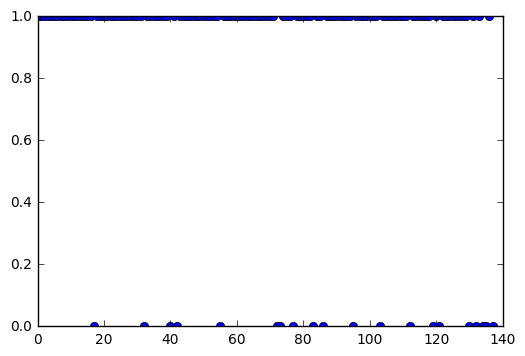

Saved age diagrams as output/70_split_validated_OneVsRest_RandomForest_histMin0_histMax144_n1000_feats0.1_msp10_max_depth3_expected_score0.133*.png


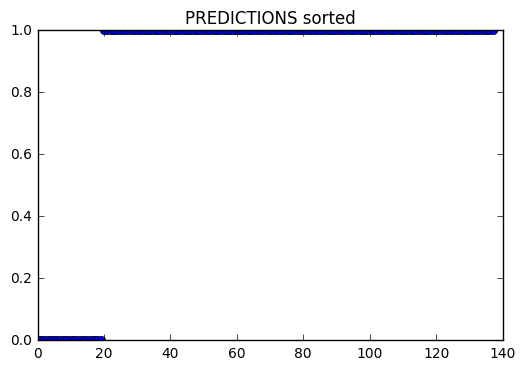

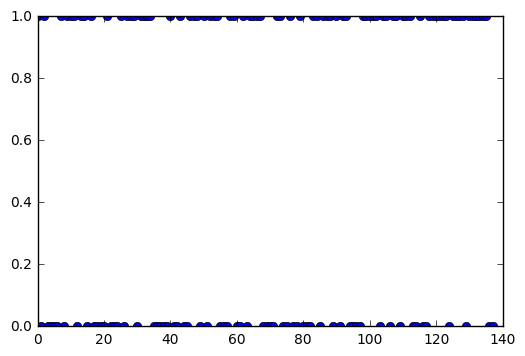

Saved age diagrams as output/70_split_validated_OneVsRest_RandomForest_histMin0_histMax144_n1000_feats0.1_msp10_max_depth3_expected_score0.133*.png


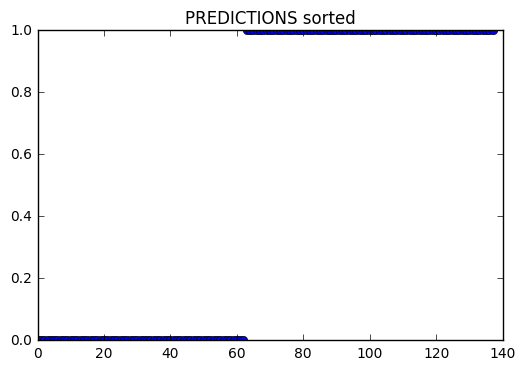

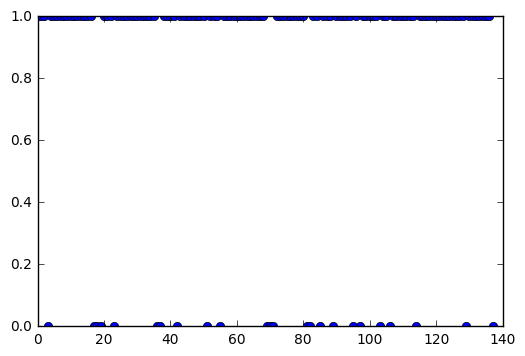

Saved age diagrams as output/70_split_validated_OneVsRest_RandomForest_histMin0_histMax144_n1000_feats0.1_msp10_max_depth3_expected_score0.133*.png


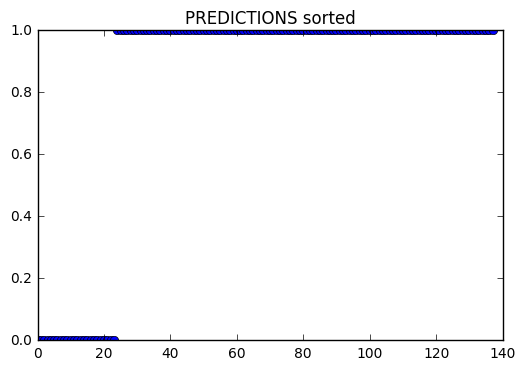

predictions of shape  (138, 3)
Saved predictions into output/70_split_validated_OneVsRest_RandomForest_histMin0_histMax144_n1000_feats0.1_msp10_max_depth3_expected_score0.133.csv
Variables available in 'result'


In [96]:
doStuff(
  #kernel="poly",gamma=1.0/2,coef0=1,deg=2,al=9,k1="poly",n_comps=15,C=1,n_est=70,
  n_est=1000,f=0.1,msp=10,max_depth=3,hmin=0,hmax=nHists,
  msplit=70)

# Histogram deviation from mean and Lasso coefficients

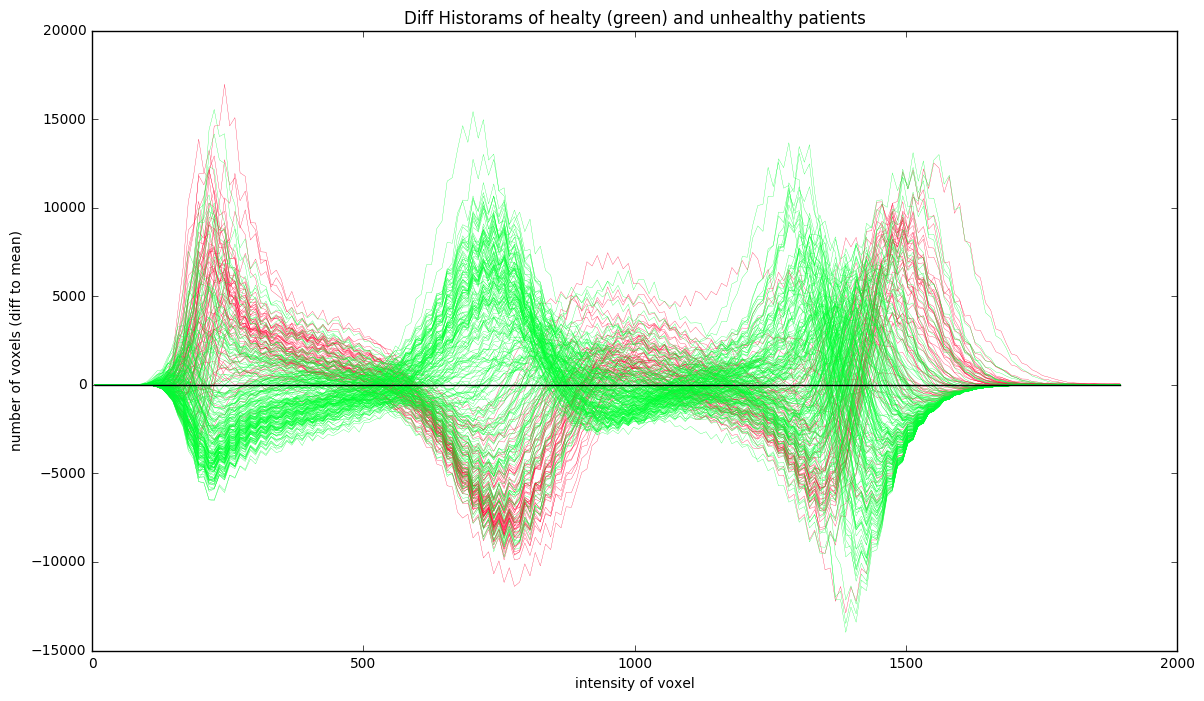

In [13]:
plt.clf()
g = "hist_viz_" + str(space)
fig = plt.figure(1)
fig.set_size_inches(14,8)
sortI = range(0,n_max)
sortI.sort(key=lambda i:y[i])
dos = sortI
for si,i in enumerate(dos):
    s = "i=%s,healthy=%s" % (i,y[i])
    c = pred_to_rgb(y[i])
    plt.plot(sbins,x[i,iHist:],color=c,linewidth=0.2)
plt.plot(sbins,x[0,iHist:]*0,color="black",linewidth=1)
plt.ylabel("number of voxels (diff to mean)")
plt.xlabel("intensity of voxel")
plt.title("Diff Historams of healty (green) and unhealthy patients")
plt.savefig(g + ".png")
plt.show()

## Visualize all Histograms deviations per Age

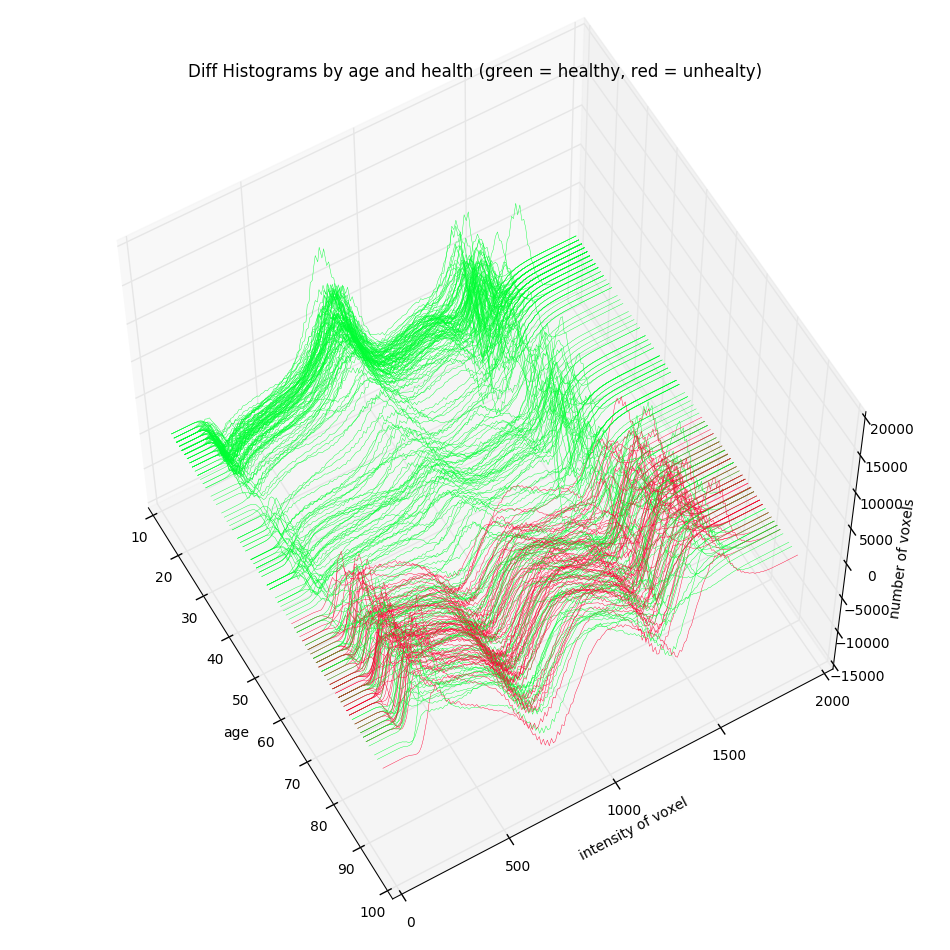

In [29]:
plot3D(x[:,iHist:],y_age,y,save_as="all-histograms-by-health-and-age_"+str(space)+".png",small=False)

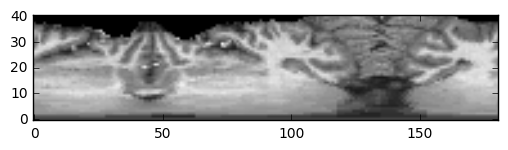

In [172]:
plt.imshow(xSpherical[7,:,53,:], cmap="gray", origin="lower")
plt.show()

In [61]:
xSpherical.shape

(416, 41, 76, 181)